<a href="https://colab.research.google.com/github/Kalid98/IA_PARKINSON/blob/main/Projet_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Les librairies nécessaires pour le projet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Les algorithmes



L'ensemble de données a été créé par Athanasios Tsanas de l'Université d'Oxford, en collaboration avec 10 centres médicaux aux États-Unis et Intel Corporation qui a développé le dispositif de télésurveillance pour enregistrer les signaux vocaux. L'étude originale a utilisé une série de méthodes de régression pour prédire le score des symptômes de la maladie de Parkinson .

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"


In [ ]:
data = pd.io.parsers.read_csv(url)
data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
data.shape

(5875, 22)

In [ ]:
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
data.nunique()

subject#           42
age                23
sex                 2
test_time        2442
motor_UPDRS      1080
total_UPDRS      1129
Jitter(%)        1305
Jitter(Abs)      4105
Jitter:RAP        853
Jitter:PPQ5       840
Jitter:DDP       1703
Shimmer          3581
Shimmer(dB)       852
Shimmer:APQ3     2664
Shimmer:APQ5     2850
Shimmer:APQ11    3283
Shimmer:DDA      4223
NHR              5532
HNR              4780
RPDE             5430
DFA              5282
PPE              4777
dtype: int64

In [ ]:
data_restricted = data.drop(columns=['Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','Shimmer:DDA','Jitter(Abs)','Jitter:RAP','Jitter:PPQ5',
                                'Jitter:DDP','motor_UPDRS','DFA','PPE'],axis = 1)

In [ ]:
data_restricted

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Shimmer,NHR,HNR,RPDE
0,1,72,0,5.6431,34.398,0.00662,0.02565,0.014290,21.640,0.41888
1,1,72,0,12.6660,34.894,0.00300,0.02024,0.011112,27.183,0.43493
2,1,72,0,19.6810,35.389,0.00481,0.01675,0.020220,23.047,0.46222
3,1,72,0,25.6470,35.810,0.00528,0.02309,0.027837,24.445,0.48730
4,1,72,0,33.6420,36.375,0.00335,0.01703,0.011625,26.126,0.47188
...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,33.485,0.00406,0.01896,0.025137,22.369,0.64215
5871,42,61,0,149.8400,32.988,0.00297,0.02315,0.011927,22.886,0.52598
5872,42,61,0,156.8200,32.495,0.00349,0.02499,0.017701,25.065,0.47792
5873,42,61,0,163.7300,32.007,0.00281,0.01484,0.007984,24.422,0.56865


In [ ]:
data_restricted.shape

(5875, 10)

In [ ]:
#Affichage des valeurs manquantes
data_restricted.isna().sum()

subject#       0
age            0
sex            0
test_time      0
total_UPDRS    0
Jitter(%)      0
Shimmer        0
NHR            0
HNR            0
RPDE           0
dtype: int64

In [ ]:
#Consever la base sous forme csv
data_restricted.to_csv("data_final.csv",index = False)

In [ ]:
data_restricted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subject#     5875 non-null   int64  
 1   age          5875 non-null   int64  
 2   sex          5875 non-null   int64  
 3   test_time    5875 non-null   float64
 4   total_UPDRS  5875 non-null   float64
 5   Jitter(%)    5875 non-null   float64
 6   Shimmer      5875 non-null   float64
 7   NHR          5875 non-null   float64
 8   HNR          5875 non-null   float64
 9   RPDE         5875 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 459.1 KB


In [ ]:
data_reindex = data_restricted.reindex(columns= ['subject#','age','sex','test_time','Jitter(%)','Shimmer','NHR','HNR','RPDE','total_UPDRS'])
data_reindex

,subject#,age,sex,test_time,Jitter(%),Shimmer,NHR,HNR,RPDE,total_UPDRS
0,1,72,0,5.6431,0.00662,0.02565,0.014290,21.640,0.41888,34.398
1,1,72,0,12.6660,0.00300,0.02024,0.011112,27.183,0.43493,34.894
2,1,72,0,19.6810,0.00481,0.01675,0.020220,23.047,0.46222,35.389
3,1,72,0,25.6470,0.00528,0.02309,0.027837,24.445,0.48730,35.810
4,1,72,0,33.6420,0.00335,0.01703,0.011625,26.126,0.47188,36.375
...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,0.00406,0.01896,0.025137,22.369,0.64215,33.485
5871,42,61,0,149.8400,0.00297,0.02315,0.011927,22.886,0.52598,32.988
5872,42,61,0,156.8200,0.00349,0.02499,0.017701,25.065,0.47792,32.495
5873,42,61,0,163.7300,0.00281,0.01484,0.007984,24.422,0.56865,32.007


In [ ]:
# Renommer les colonnes
data_reindex.columns = (['Individu','age','sexe','Duree_test','Vari_freq_voix(%)','Vari_amplitude','rapport_bruit_harmonie','rapport_harmonie_bruit','dynamique_non_linéaire','Echelle_evaluation_Parkinson'])
data_reindex

,Individu,age,sexe,Duree_test,Vari_freq_voix(%),Vari_amplitude,rapport_bruit_harmonie,rapport_harmonie_bruit,dynamique_non_linéaire,Echelle_evaluation_Parkinson
0,1,72,0,5.6431,0.00662,0.02565,0.014290,21.640,0.41888,34.398
1,1,72,0,12.6660,0.00300,0.02024,0.011112,27.183,0.43493,34.894
2,1,72,0,19.6810,0.00481,0.01675,0.020220,23.047,0.46222,35.389
3,1,72,0,25.6470,0.00528,0.02309,0.027837,24.445,0.48730,35.810
4,1,72,0,33.6420,0.00335,0.01703,0.011625,26.126,0.47188,36.375
...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,0.00406,0.01896,0.025137,22.369,0.64215,33.485
5871,42,61,0,149.8400,0.00297,0.02315,0.011927,22.886,0.52598,32.988
5872,42,61,0,156.8200,0.00349,0.02499,0.017701,25.065,0.47792,32.495
5873,42,61,0,163.7300,0.00281,0.01484,0.007984,24.422,0.56865,32.007


In [ ]:
data_final = data_reindex
data_final

,Individu,age,sexe,Duree_test,Vari_freq_voix(%),Vari_amplitude,rapport_bruit_harmonie,rapport_harmonie_bruit,dynamique_non_linéaire,Echelle_evaluation_Parkinson
0,1,72,0,5.6431,0.00662,0.02565,0.014290,21.640,0.41888,34.398
1,1,72,0,12.6660,0.00300,0.02024,0.011112,27.183,0.43493,34.894
2,1,72,0,19.6810,0.00481,0.01675,0.020220,23.047,0.46222,35.389
3,1,72,0,25.6470,0.00528,0.02309,0.027837,24.445,0.48730,35.810
4,1,72,0,33.6420,0.00335,0.01703,0.011625,26.126,0.47188,36.375
...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,0.00406,0.01896,0.025137,22.369,0.64215,33.485
5871,42,61,0,149.8400,0.00297,0.02315,0.011927,22.886,0.52598,32.988
5872,42,61,0,156.8200,0.00349,0.02499,0.017701,25.065,0.47792,32.495
5873,42,61,0,163.7300,0.00281,0.01484,0.007984,24.422,0.56865,32.007


In [ ]:
# Fonciton de construction de diagramme en barre
def hist_plot (b):
  sns.distplot(data_final[b], kde=False)
  plt.title('Histogram of'+str(b))
  return plt.show()

In [ ]:
# Afficher quelques variables
numerical_columns = ['Vari_amplitude','age','Echelle_evaluation_Parkinson']

In [ ]:
import plotly.express as px
fig = px.bar(data_final, x='age', y='rapport_bruit_harmonie')
fig.show()

In [ ]:
#pie chart
fig = px.pie(data_final,names ='sexe')
fig.show()

In [ ]:
pip install plotly

In [ ]:
data_final['Vari_amplitude'] = data_final['Vari_amplitude'].replace(' ',np.nan).astype(float)

data_final['age'] = data_final['age'].replace(' ',np.nan).astype(float)

data_final['Echelle_evaluation_Parkinson'] = data_final['Echelle_evaluation_Parkinson'].replace(' ',np.nan).astype(float)

In [ ]:
interact(hist_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('Vari_amplitude', 'age', 'Echelle_evaluation_Parkinso…

In [ ]:
#Calcul du coefficient d'asymétrie
data_final['Echelle_evaluation_Parkinson'].skew()
#On voit que ce coef est très petit (tend vers 0) donc assez symétrique donc homogène

0.27105334561788413

interactive(children=(Dropdown(description='b', options=('Vari_amplitude', 'age', 'Echelle_evaluation_Parkinso…

<function __main__.box_plot(b)>

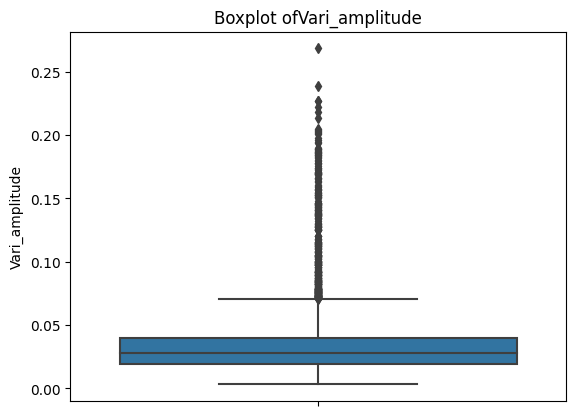

In [ ]:
#Vérification à travers les boites à moustaches
#Construction de fonction de création de boite à moustache
def box_plot(b):
  sns.boxplot(y = data_final[b])
  plt.title('Boxplot of' + str(b))
  return plt.shox()

# Interact

interact(box_plot, b = numerical_columns)

In [ ]:
#Le résumé statistique
data_final.describe()

,Individu,age,sexe,Duree_test,Vari_freq_voix(%),Vari_amplitude,rapport_bruit_harmonie,rapport_harmonie_bruit,dynamique_non_linéaire,Echelle_evaluation_Parkinson
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,0.006154,0.034035,0.032120,21.679495,0.541473,29.018942
std,12.372279,8.821524,0.465656,53.445602,0.005624,0.025835,0.059692,4.291096,0.100986,10.700283
min,1.000000,36.000000,0.000000,-4.262500,0.000830,0.003060,0.000286,1.659000,0.151020,7.000000
25%,10.000000,58.000000,0.000000,46.847500,0.003580,0.019120,0.010955,19.406000,0.469785,21.371000
50%,22.000000,65.000000,0.000000,91.523000,0.004900,0.027510,0.018448,21.920000,0.542250,27.576000
75%,33.000000,72.000000,1.000000,138.445000,0.006800,0.039750,0.031463,24.444000,0.614045,36.399000
max,42.000000,85.000000,1.000000,215.490000,0.099990,0.268630,0.748260,37.875000,0.966080,54.992000


In [ ]:
#

DIVISION DE NOS DONNEES : entreinnement , validation et test .

In [ ]:
#Le target de notre modèle

Y= data_final.loc[:,["Echelle_evaluation_Parkinson"]]
Y


,Echelle_evaluation_Parkinson
0,34.398
1,34.894
2,35.389
3,35.810
4,36.375
...,...
5870,33.485
5871,32.988
5872,32.495
5873,32.007


In [ ]:
Y.shape

(5875, 1)

In [ ]:
# Répertotier nos features avec une boucle
cols=data_final.columns

features=[]
for c in cols:
    if c not in ["id","Echelle_evaluation_Parkinson"]:
        features.append(c)
features

['Individu',
 'age',
 'sexe',
 'Duree_test',
 'Vari_freq_voix(%)',
 'Vari_amplitude',
 'rapport_bruit_harmonie',
 'rapport_harmonie_bruit',
 'dynamique_non_linéaire']

In [ ]:
#Nos features

X = data_final.loc[:,features]
X

,Individu,age,sexe,Duree_test,Vari_freq_voix(%),Vari_amplitude,rapport_bruit_harmonie,rapport_harmonie_bruit,dynamique_non_linéaire
0,1,72.0,0,5.6431,0.00662,0.02565,0.014290,21.640,0.41888
1,1,72.0,0,12.6660,0.00300,0.02024,0.011112,27.183,0.43493
2,1,72.0,0,19.6810,0.00481,0.01675,0.020220,23.047,0.46222
3,1,72.0,0,25.6470,0.00528,0.02309,0.027837,24.445,0.48730
4,1,72.0,0,33.6420,0.00335,0.01703,0.011625,26.126,0.47188
...,...,...,...,...,...,...,...,...,...
5870,42,61.0,0,142.7900,0.00406,0.01896,0.025137,22.369,0.64215
5871,42,61.0,0,149.8400,0.00297,0.02315,0.011927,22.886,0.52598
5872,42,61.0,0,156.8200,0.00349,0.02499,0.017701,25.065,0.47792
5873,42,61.0,0,163.7300,0.00281,0.01484,0.007984,24.422,0.56865


ENTRAINONS NOS DONNEES

In [ ]:
X_train=X.loc[875:5875,:]
X_test=X.loc[0:874,]

Y_train= Y.loc[875:5875,]
Y_test=Y.loc[0:874,]

In [ ]:
X_train

,Individu,age,sexe,Duree_test,Vari_freq_voix(%),Vari_amplitude,rapport_bruit_harmonie,rapport_harmonie_bruit,dynamique_non_linéaire
875,6,63.0,0,103.34,0.00346,0.02703,0.007692,23.252,0.45862
876,6,63.0,0,110.34,0.00513,0.04349,0.017210,23.458,0.43906
877,6,63.0,0,117.33,0.00624,0.02227,0.033367,24.870,0.43140
878,6,63.0,0,124.34,0.00688,0.06034,0.032892,20.345,0.47532
879,6,63.0,0,131.34,0.00575,0.03627,0.030279,22.367,0.46896
...,...,...,...,...,...,...,...,...,...
5870,42,61.0,0,142.79,0.00406,0.01896,0.025137,22.369,0.64215
5871,42,61.0,0,149.84,0.00297,0.02315,0.011927,22.886,0.52598
5872,42,61.0,0,156.82,0.00349,0.02499,0.017701,25.065,0.47792
5873,42,61.0,0,163.73,0.00281,0.01484,0.007984,24.422,0.56865


In [ ]:
Y_train

,Echelle_evaluation_Parkinson
875,40.822
876,41.289
877,41.756
878,42.223
879,42.689
...,...
5870,33.485
5871,32.988
5872,32.495
5873,32.007


In [ ]:
# Appliquons le Linear regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,Y_train)
pred_test=reg.predict(X_test)

from sklearn.metrics import mean_squared_error

score=mean_squared_error(Y_test,pred_test)
score_final =np.sqrt(score)
print("Score final", score_final)

Score final 16.73861015801157


In [ ]:
#Appliqouns le Ridge regression

from sklearn.linear_model import Ridge

rid =  Ridge(alpha = 1.2)
rid.fit(X_train, Y_train)
pred_test_ridge = rid.predict(X_test)


from sklearn.metrics import mean_squared_error


score_ridge=mean_squared_error(Y_test,pred_test_ridge)

score_final_ridge = np.sqrt(score_ridge)


print("Score final Ridge", score_final_ridge)

Score final Ridge 16.585649422790787


In [ ]:
#Appliquons le LASSO

from sklearn.linear_model import Lasso

las =  Lasso(alpha = 1.2)
las.fit(X_train,Y_train)


pred_test_lasso = las.predict(X_test)


from sklearn.metrics import mean_squared_error


score_lasso=mean_squared_error(Y_test,pred_test_lasso)

score_final_lasso = np.sqrt(score_lasso)

print("Score final Lasso", score_final_lasso)

Score final Lasso 16.620090109364615


In [ ]:
from sklearn.linear_model import ElasticNet
reg_ElasticNet = ElasticNet( alpha = 1, l1_ratio = 1)
reg_ElasticNet.fit(X_train,Y_train)
pred_test_ElasticNet=reg_ElasticNet.predict(X_test)

score=mean_squared_error(Y_test,pred_test_ElasticNet)
score_final4=np.sqrt(score)
print("Score final", score_final4)

Score final 16.642397799845117


In [ ]:
 #CONCLUSION: LINEAR > ELASTIC NET > LASSO > RIDGE =16.585 donc [Y(ridge)=16.585] car on retient le plus petit resultat

In [ ]:
#Tableau de correlation :: Vérifions la correlation entre les varaibles
data_final.corr()

,Individu,age,sexe,Duree_test,Vari_freq_voix(%),Vari_amplitude,rapport_bruit_harmonie,rapport_harmonie_bruit,dynamique_non_linéaire,Echelle_evaluation_Parkinson
Individu,1.000000,-0.030864,0.286851,-0.000882,0.135448,0.146202,0.168743,-0.206929,0.147300,0.253643
age,-0.030864,1.000000,-0.041602,0.019884,0.023071,0.101554,0.007093,-0.104842,0.090208,0.310290
sexe,0.286851,-0.041602,1.000000,-0.009805,0.051422,0.058736,0.168170,-0.000167,-0.159262,-0.096559
Duree_test,-0.000882,0.019884,-0.009805,1.000000,-0.022837,-0.033870,-0.026357,0.036545,-0.038887,0.075263
Vari_freq_voix(%),0.135448,0.023071,0.051422,-0.022837,1.000000,0.709791,0.825294,-0.675188,0.427128,0.074247
Vari_amplitude,0.146202,0.101554,0.058736,-0.033870,0.709791,1.000000,0.795158,-0.801416,0.468235,0.092141
rapport_bruit_harmonie,0.168743,0.007093,0.168170,-0.026357,0.825294,0.795158,1.000000,-0.684412,0.416660,0.060952
rapport_harmonie_bruit,-0.206929,-0.104842,-0.000167,0.036545,-0.675188,-0.801416,-0.684412,1.000000,-0.659053,-0.162117
dynamique_non_linéaire,0.147300,0.090208,-0.159262,-0.038887,0.427128,0.468235,0.416660,-0.659053,1.000000,0.156897
Echelle_evaluation_Parkinson,0.253643,0.310290,-0.096559,0.075263,0.074247,0.092141,0.060952,-0.162117,0.156897,1.000000


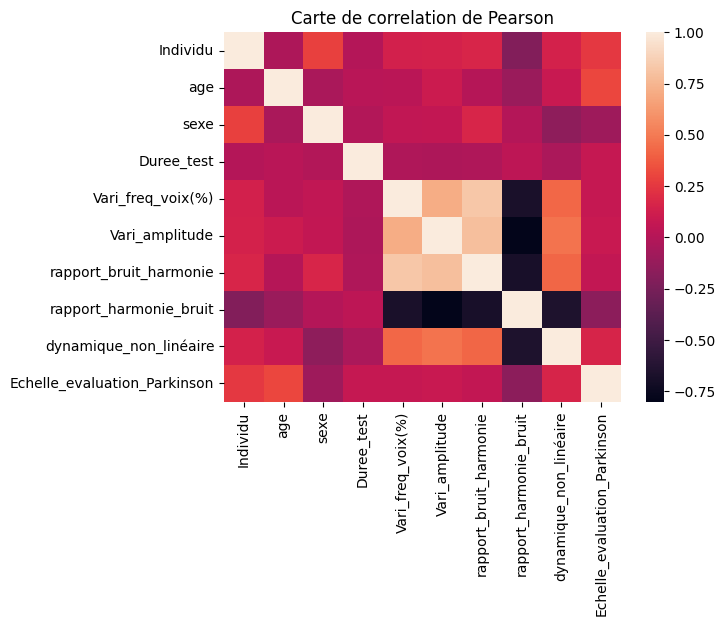

In [ ]:
#Matrice de correlation
sns.heatmap(data_final.corr()).set_title('Carte de correlation de Pearson');

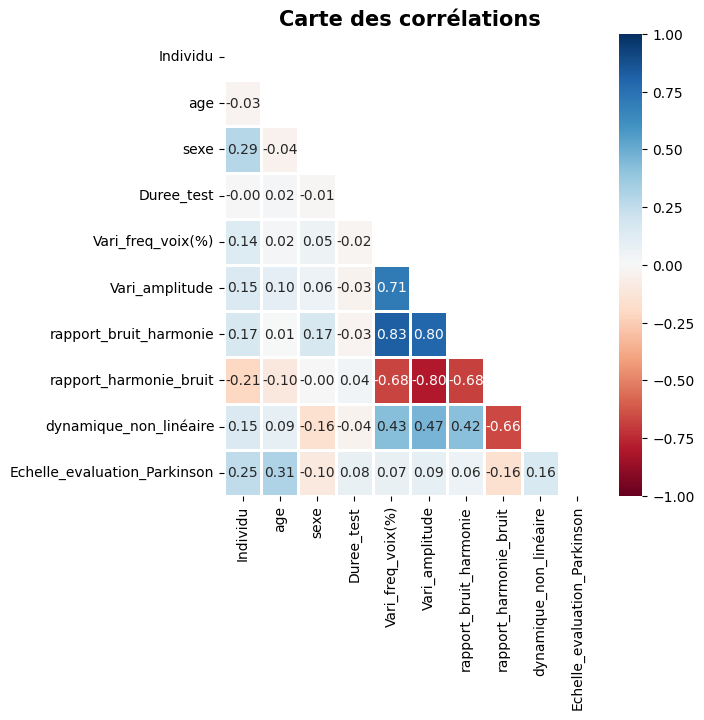

In [ ]:
#La matrice optimale : masquons la seconde moitier de la matrice
plt.figure(figsize=(6,6))
mask = np.triu(np.ones_like(data_final.corr(), dtype=bool))
sns.heatmap(data_final.corr(), mask=mask, center=0, cmap='RdBu',
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations', fontsize = 15, fontweight='bold')
plt.show()

Dans cet exemple, nous avons créé un DataFrame pandas avec des colonnes x, y et label. Nous avons ensuite créé une source de données Bokeh en utilisant le DataFrame comme argument pour la classe ColumnDataSource. Ensuite, nous avons créé un nuage de points interactif en utilisant la fonction circle de la figure Bokeh et en passant les noms de colonnes x et y en tant qu'arguments. Nous avons également ajouté une fonction hover pour afficher les informations sur les points survolés, y compris la colonne label que nous avons ajoutée à la source de données Bokeh.

Vous pouvez personnaliser la taille, la couleur et d'autres aspects de la visualisation en modifiant les paramètres de la fonction circle et en ajoutant d'autres outils de visualisation Bokeh tels que des légendes, des axes et des annotations.

<function matplotlib.pyplot.show(close=None, block=None)>

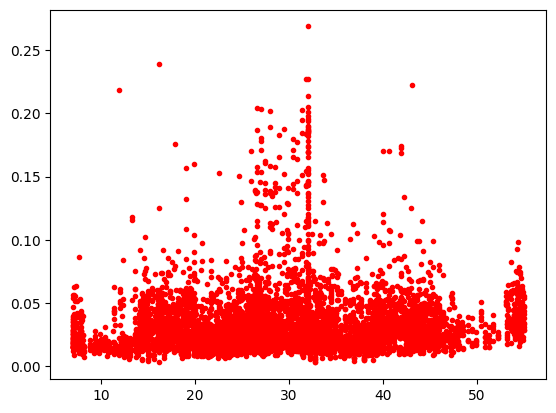

In [ ]:
plt.plot(data_final['Echelle_evaluation_Parkinson'],data_final['Vari_amplitude'],'ro',markersize =3)
plt.show